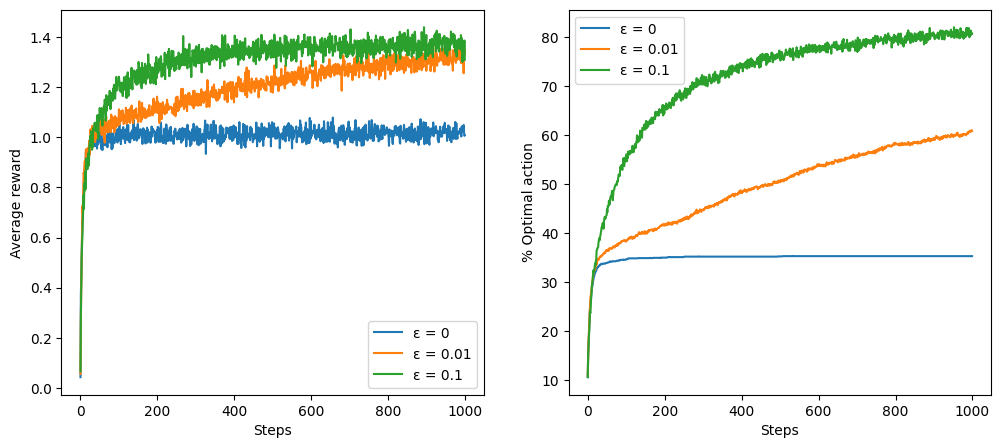

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class Bandit:
    def __init__(self, k=10):
        self.k = k
        self.q_true = np.random.normal(0, 1, k)
        self.best_action = np.argmax(self.q_true)

    def step(self, action):

        return np.random.normal(self.q_true[action], 1)

class EpsilonGreedyAgent:
    def __init__(self, k=10, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.Q = np.zeros(k)
        self.N = np.zeros(k)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.Q)

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]

# Run experiment
def run_experiment(k=10, steps=1000, runs=2000, epsilons=[0, 0.01, 0.1]):
    avg_rewards = np.zeros((len(epsilons), steps))
    opt_actions = np.zeros((len(epsilons), steps))

    for run in range(runs):
        bandit = Bandit(k)
        for i, eps in enumerate(epsilons):
            agent = EpsilonGreedyAgent(k, eps)
            for step in range(steps):
                action = agent.select_action()
                reward = bandit.step(action)
                agent.update(action, reward)

                avg_rewards[i, step] += reward
                if action == bandit.best_action:
                    opt_actions[i, step] += 1

    avg_rewards /= runs
    opt_actions = (opt_actions / runs) * 100
    return avg_rewards, opt_actions

# Main execution
epsilons = [0, 0.01, 0.1]
avg_rewards, opt_actions = run_experiment(epsilons=epsilons)

# Plot results
plt.figure(figsize=(12, 5))

# Average reward plot
plt.subplot(1, 2, 1)
for i, eps in enumerate(epsilons):
    plt.plot(avg_rewards[i], label=f"ε = {eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# Optimal action plot
plt.subplot(1, 2, 2)
for i, eps in enumerate(epsilons):
    plt.plot(opt_actions[i], label=f"ε = {eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()
